# KASZCZ - notes
# 

In [1]:
using Plots
using StatsBase
using Distributions
using StatsFuns
using KernelDensity
using Statistics
using StatsPlots
using CSV
using DataFrames
using LaTeXStrings

# Pierwsze zajęcia

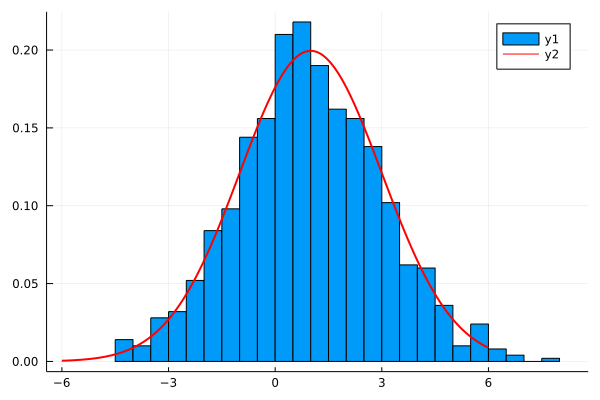

In [21]:
X = rand(Normal(1, 2), 1000)
histogram(X, bins=30, norm=true)

xs = -6:0.01:6
plot!(xs, pdf.(Normal(1, 2), xs), color=:red, lw=2)

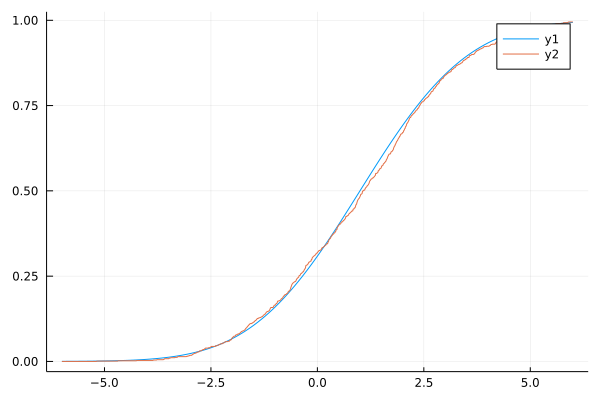

In [28]:
X = rand(Normal(1, 2), 1000)
F = ecdf(X)
xs = -6:0.01:6
plot(xs, cdf.(Normal(1, 2), xs))
plot!(xs, F.(xs))

# Lista 1

## Zadanie 1

In [31]:
file = open("zad1_lista1.txt")
data = readlines(file)
close(file)
data

1000-element Vector{String}:
 "   2.0490626e-01  -3.2205502e+00"
 "   9.8945649e-02  -1.1258680e+00"
 "   2.0636720e+00   1.2928829e+01"
 "   9.0607812e-02   6.9178623e+00"
 "   4.5829762e-01  -6.0477376e-01"
 "   2.3274886e+00   1.0360501e+01"
 "   1.2783436e+00   3.4827574e+00"
 "   6.0352310e-01   8.1949464e+00"
 "   4.3422419e-02  -7.8077760e-01"
 "   3.5742692e-02   1.0832976e+01"
 "   1.8476121e+00  -1.9517961e-01"
 "   2.9848279e-02   4.4988383e+00"
 "   4.3777453e-02  -4.4987333e+00"
 ⋮
 "   9.3965639e-01   5.8635093e+00"
 "   2.0316924e-01   4.9671481e+00"
 "   1.1475047e+00   1.5785078e+01"
 "   2.0513202e-01   1.0432906e+01"
 "   2.3689579e-01   8.1933621e+00"
 "   1.5985907e-01  -3.7372587e-02"
 "   6.8193701e-01   9.5902234e+00"
 "   4.5308926e-01   2.7684125e+00"
 "   5.0352247e-02   1.6329001e+00"
 "   8.1201145e-01   7.2318393e+00"
 "   2.8130971e+00   6.2687607e+00"
 "   1.4300481e-01  -8.8030861e+00"

In [77]:
data_split = split.(data, "  ")
X = parse.(Float64, getindex.(data_split, 2))
Y = parse.(Float64, getindex.(data_split, 3))

1000-element Vector{Float64}:
 -3.2205502
 -1.125868
 12.928829
  6.9178623
 -0.60477376
 10.360501
  3.4827574
  8.1949464
 -0.7807776
 10.832976
 -0.19517961
  4.4988383
 -4.4987333
  ⋮
  5.8635093
  4.9671481
 15.785078
 10.432906
  8.1933621
 -0.037372587
  9.5902234
  2.7684125
  1.6329001
  7.2318393
  6.2687607
 -8.8030861

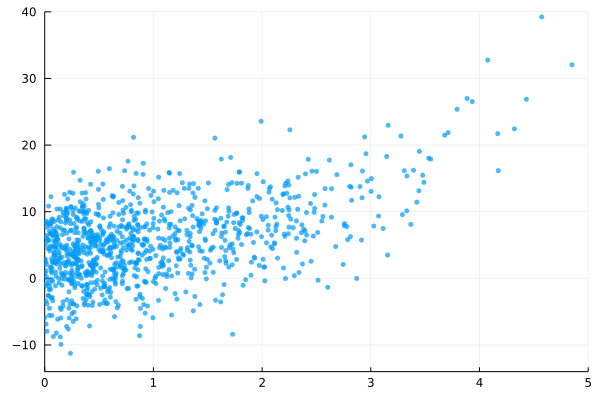

In [118]:
scatter(X, Y, ylim=(-14, 40), xlim=(0, 5), ms=3, alpha=0.7, markerstrokewidth=0, legend=false)

In [117]:
cor(X, Y)

0.5904985680866514

In [121]:
corspearman(X, Y)

0.39694022494022496

## Zadanie 2

In [144]:
file = open("zad2_lista1.txt")
lines = readlines(file)
close(file)
data = parse.(Float64, lines)

10000-element Vector{Float64}:
  1.8386764
  1.855805
  0.69752129
  1.2962382
  0.75562108
  1.626694
  0.94778493
  1.1341207
  1.4429193
  2.7800594
  1.6193562
  1.768766
  1.9668119
  ⋮
 -0.25455696
  0.45844263
 -0.8783921
 -0.50943653
 -0.41153596
  1.0593411
  0.16641131
 -0.2649519
  1.8417961
 -0.019291102
  0.016198161
  2.3294532

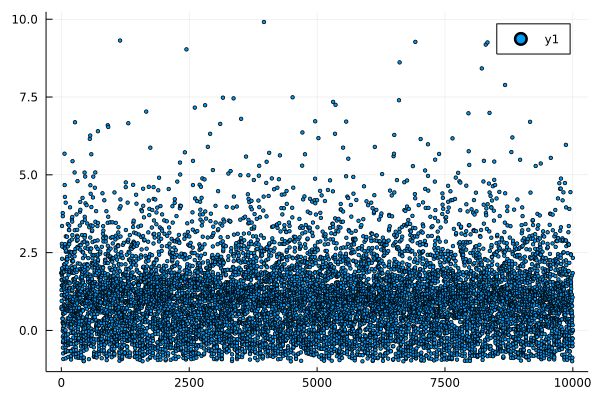

In [134]:
scatter(data, ms=2)

In [146]:
function pMA(X, p)
    S = Float64[]
    for i in p+1 : length(X)-p
        s = mean(X[i-p:i+p])
        append!(S, s)
    end
    return S
end

pMA (generic function with 1 method)

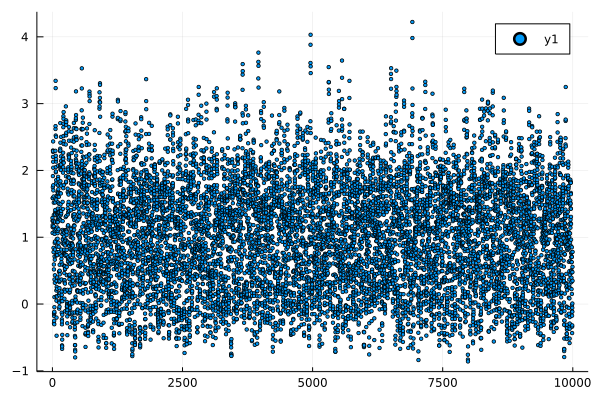

In [149]:
preprocessed_data = pMA(data, 2)
scatter(preprocessed_data, ms=2)